Библиотеки

In [ ]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

import numpy as np

определяем фигуру

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

загружаем изображение

In [ ]:
image = cv2.imread('/content/кружка из урока.png')

характеристики объекта

In [ ]:
image.shape

(759, 577, 3)

уменьшаем изображение

In [ ]:
image = cv2.resize(image, (480, 640))

чертим график

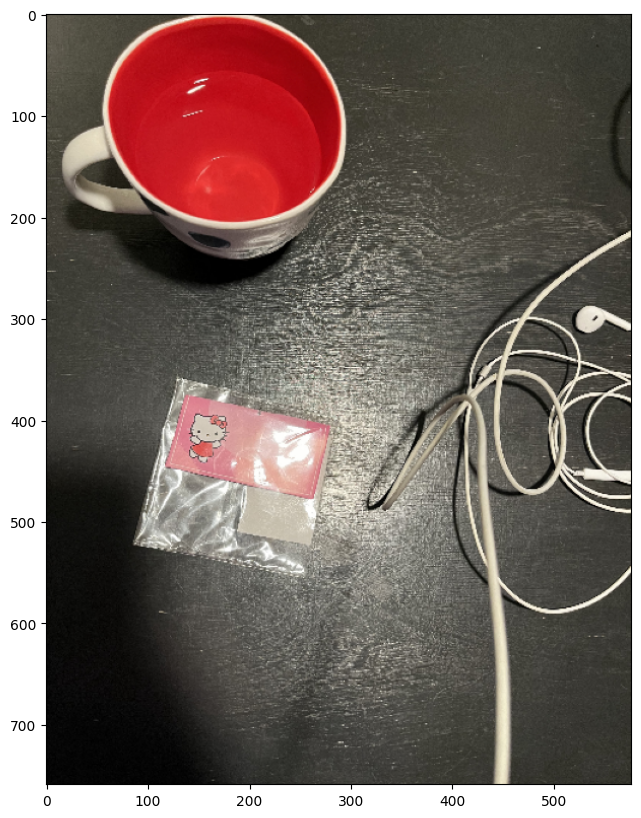

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

переводим изображение в оттенки серого

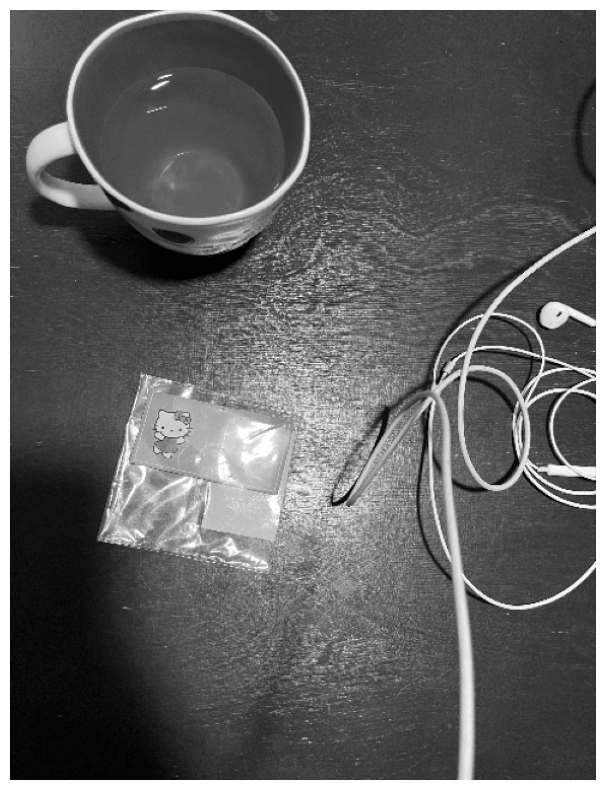

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

метод для обнаружения краев объектов

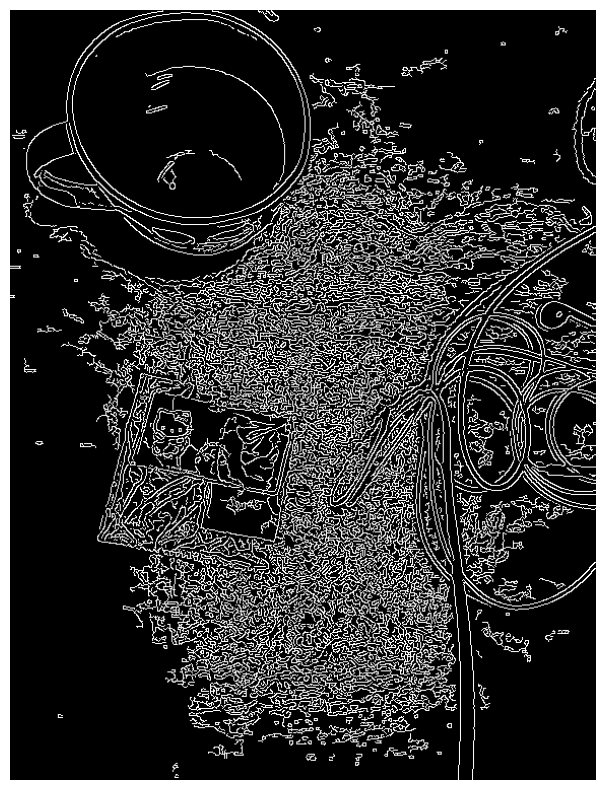

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Пример чтения изображения
image = cv2.imread('/content/кружка из урока.png')  # Замените 'path_to_image' на путь к вашему изображению

# Конвертация в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия (например, GaussianBlur)
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Применение Canny
edged = cv2.Canny(gray_blurred, 10, 50)

# Отображение результата
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

анализируем контуры объектов

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts[1]

array([[[160, 745]],

       [[161, 744]],

       [[163, 744]],

       [[164, 745]],

       [[162, 747]]], dtype=int32)

ищем почти круги в четырехугольнках

In [ ]:
# Теперь мы хотим найти такие контуры, что приближаются черетыхугольником

cnts = sorted(cnts,
              key = cv2.contourArea, # функция-компоратор
              reverse = True)

solution = None
for c in cnts:
    # считаем пермиметр чтобы задать погрешность
    peri = cv2.arcLength(c, True)
    # считаем аппроксимацию
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        solution = approx
        break

С помощью библиотеки Matplotlib отображаем изображение с наложенными границами и контурами

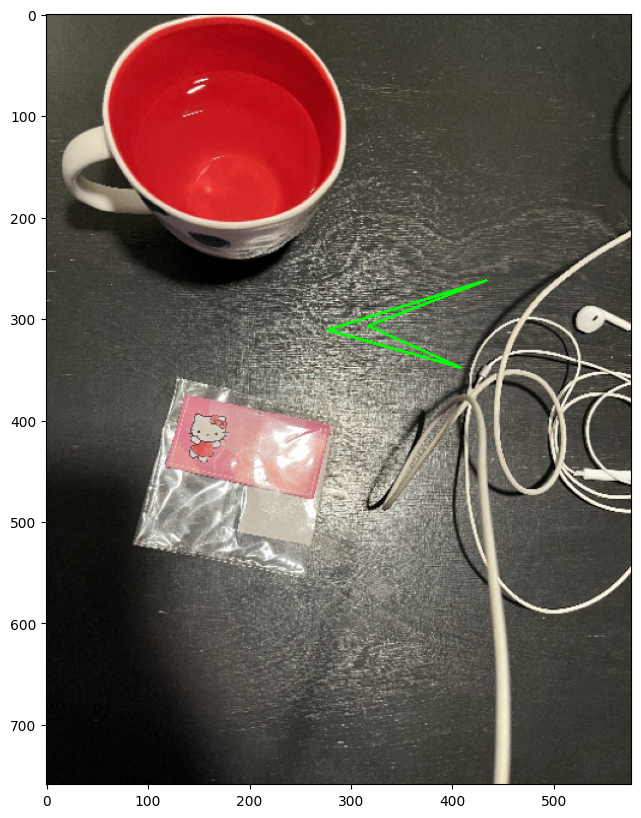

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))

дорисовываем окружность

In [ ]:
solution = None
for c in cnts:

    (x, y), radius = cv2.minEnclosingCircle(c)
    circle_area = np.pi * (radius ** 2)
    contour_area = cv2.contourArea(c)

    if contour_area / circle_area > 0.8:
        solution = c
        break

Детектируем объект

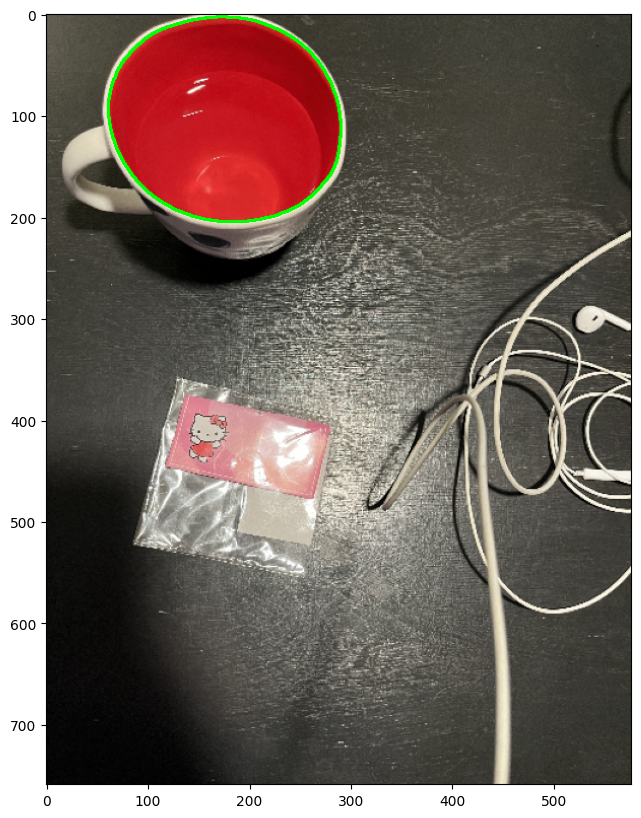

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))